<a href="https://colab.research.google.com/github/BRAINLab-Aachen/MazeMaster/blob/main/Maze_Master_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MazeMaster Package


__Authors:__ Alexander Bexter, Björn Kampa

  [Brain Lab RWTH](https://brain.rwth-aachen.de) 

  __Publication:__ [MazeMaster: an open-source Python-based software package for controlling virtual reality experiments](https://www.biorxiv.org/content/10.1101/2020.01.27.921148v2)

   __GitHub:__ [MazeMaster](https://github.com/BRAINLab-Aachen/MazeMaster)
  

&nbsp; 



*For further information or questions contact: elisabeta.balla@rwth-aachen.de*


---
## Intro
**MazeMaster** is designed as an all-in-one software package, which allows the user to create new experiments, including VR environments, in a few minutes. The combination of a graphical drawing-board-like maze building interface (MazeBuilder) and an interface for automated creation and monitoring of complete behavioural and neurophysiological experiments is an outstanding feature of this toolbox. It is possible to extend the functionality to present stimuli of various modalities and even combine these to create a multisensory virtual environment. As an example, a demo is provided in which air puffs are implemented in a virtual corridor to combine tactile and visual cues. Custom scripts can be added and started at individual time points during an experiment to flexibly add any additional functionality to the program. The software package is an approach to standardize similar experiments by using the same open-source tools (Freeman, 2015) as also recommended by the FAIR principles (Wilkinson et al., 2016). Since a lot of experiments in the field of behavioural neuroscience use similar experimental setups and designs, it would be favourable to share common software toolboxes. A lot of resources can be saved by preventing long development processes to create own customized software, but instead, build on already existing and approved frameworks covering the required functionality. The provided software toolbox (MazeBuilder) is free to use and open-source. Researchers are invited to use the toolbox under the open-source license and further extend its functionality. The whole software is written in Python, which is also free of charge and commonly used. Figure 1 shows an overview of a VR setup used with MazeMaster (panel A and B) as well as an example view from within a virtual maze (panel C).




#### *Figure 1. MazeMaster Setup.*  
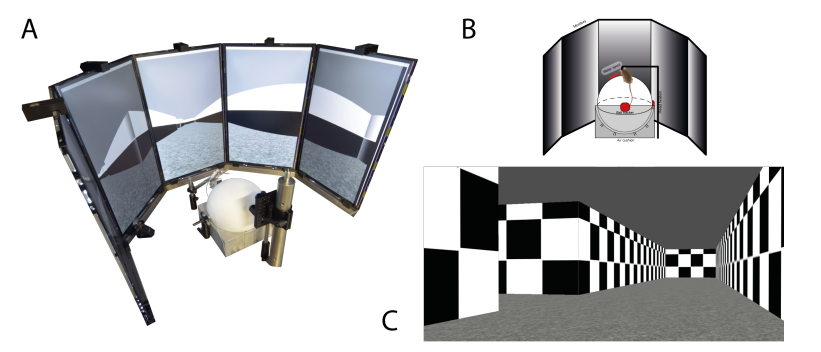

**Figure 1.** A) Setup of a virtual reality with five monitors in a semicircle with a ball as an input device. B) Schematic drawing of the setup in A. C) View from within a virtual Maze.

---
## 1. VR Solution

MazeMaster comes as a bundle that connects a 3D engine (Blender game engine) with a powerful maze experiment design and control tool. With this, it is possible to create and modulate complex mazes, simple tunnels or other forms of three-dimensional constructs. The tool can be used to design and conduct behavioural experiments for mice and rats but also for human participants. MazeMaster consists of several modules, which are combined within a graphical user interface (GUI). This GUI is provided to help the user with creating and monitoring virtual environments and experiments. There is no coding knowledge required to use it. The toolbox already includes parts for setting up a 3D environment, run an experiment and save the corresponding data. No further software is necessary. To combine the VR behaviour experiments with electrophysiological recordings or imaging of brain activity digital triggers can be introduced for the communication of MazeMaster with the acquisition software. Usually, experiments are performed in closed-loop with the animal starting and finishing each trial. In this case, MazeMaster would act as a master, controlling any further data acquisition as a slave. However, experiments can also be performed under external control for open-loop configurations.

### 1.1 Environment
The software is written in Python 3.7. Blender files are created with Blender v2.79. So far, the software is only running on a Windows system. The MazeMaster toolbox can be installed and used as a pre-compiled file on a Windows PC. No further installation of Python or additional modules is required. Python Modules used in the creation progress Several existing python modules were used to create MazeMaster. The GUI was created with the tkinter module. Network communication is realized via the asynchronous socket service handler asyncore. For hardware control, the module nidaqmx was used, which is the interface for all National Instruments hardware. To use it, the NI-DAQmx drivers from National Instruments have to be installed. 

### 1.2 Hardware

The software is compatible with different kinds of hardware. A complete list of hardware parts that were used with the software so far can be found in table 1. Theoretically, any device can be used for displaying the maze (e.g. computer screens, projectors), since the window can be scaled to any size. Nevertheless, the angle of displaying the maze has to be changed according to the relative position of the subject. So far, there are pre-configured settings for one or two monitors, as well as an arrangement in a semicircle (c.f. Heys et al. (2014)). The latter includes monitors, but also projectors that project the image onto a dome. 

### 1.3 Software Architecture
The program is divided into several modules, containing classes with different functions. An overview over the most important modules and the stream of data is shown in figure 2 A. Since MazeMaster is designed to be extendable, more modules with new classes can be created to add new functions to the program. The main part which connects all included modules is the MazeMaster GUI. With this main GUI, everything can be controlled, including the MazeBuilder and the Blender interface. All MazeMaster Python modules are imported into the main script from where the initialization of all class objects is done and the GUI is started. The already implemented modules often use an individual GUI window to add new functionality. Those functions are active, as long as the corresponding GUI window is open. Those windows are connected to the MazeMaster window top menu through which they are opened. New mazes can be created by using the MazeMaster, which comes with a drawing board-like GUI. This allows the creation of an extensive variety of mazes that can be saved and archived as .maze files. The MazeBuilder is a standalone program and can also be used without the GUI of MazeMaster. The input from the connected devices is processed by the tracking module and transmitted to the main modules. A new device can be created by adding a new class to the module, so far there are classes for a ball and a wheel. All information is relayed to the blender game engine via the communication class. For this, a socket connection is used with the help of the server class. All data is stored in a data container and saved at the end of every trial. Most information is also displayed in the MazeMaster GUI. The maze file, which is created with the help of the MazeBuilder, is read by the maze-building script (createmm.py, not shown) and used by the game engine. 

#### *Figure 2. MazeMaster connectivity and settings.*

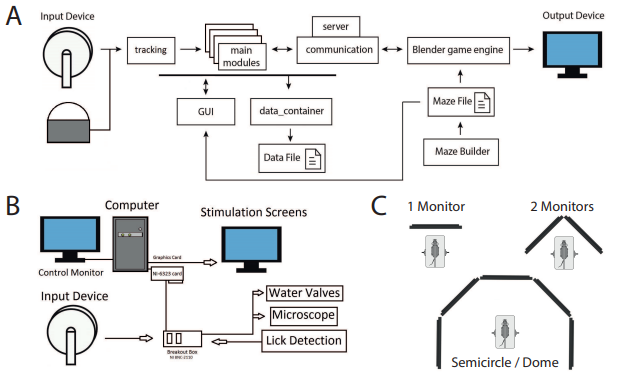

**Figure 2. MazeMaster connectivity and settings.** A) Sketch for general stream of data. Arrows indicate the direction of data flow and communication. The main modules represent all other modules, which are not mentioned separately. The communication module uses the server module to establish a connection and communicate with the blender game engine. B) Sketch for general hardware parts of a setup to use with MazeMaster. Arrows indicate the direction of data flow and communication. Water valves, microscope, and lick detection are used in most setups but can be freely extended with further devices. C) Possible modes for displaying the virtual reality on three different arrangements of monitors or screens. The display mode can be selected in the settings.

#### 1.3.1 Integration with Blender Game Engine

For creating and displaying the maze on the monitors, the Blender 3D game engine (www. blender.org) is used. A blender file (virtualMaze.blend) is run in the blenderplayer, a standalone executable from blender to run the Blender game engine. A python script (createmm.py) is run when the connection to Blender is established with the help of the server module. This script creates the maze from the maze file as a three-dimensional model in Blender and configures all parameters in Blender for the environment. After that, it saves all changes to the Blender file (virtualMaze.blend). For all further communication, the network connection, which was started by server.py, is used. This connection uses an asynchronous socket for communication. Similar to using multi-threading, the asynchronous socket allows MazeMaster to continue running while communicating in the background without having to wait for finishing the network tasks. 

### 1.4 Functionality


#### 1.4.1 Main Graphical user interface

MazeMaster Main Graphical user interface with the GUI, it is easy to set up and configure an experiment. It is divided into different sections (see Figure 3). The top menu Windows opens several additional windows, which are not open by default. The drop-down menu View lets the user configure and save the default positions of the different windows. In the General Settings section, the user can define different sets of settings for the experiment control, as well as the file saving directory. Those sets of settings are saved as experiments and associated tasks, which can be freely created and loaded by the user. The Server Control section allows the user to start the Blender Game Engine and connect MazeMaster to it. The Server Status indicator shows the status of the connection to the graphical engine (online, waiting for connection, offline). The Disconnect button stops the connection to the engine and closes the session. The Cues section lists all loaded visual cues and lets the user load new cues and delete not used ones. Those cues are loaded and created from image files, which should be square-shaped. Different sets of cues can be loaded, too. The chosen cues can be presented at defined locations within the virtual reality indicated by the cue identifier number. The cues are either constantly visible (Cues on Walls) or invisible until a cue trig ger is present or until the subject reaches a specified location in the maze where the cues are then flashed on the maze walls (Flash Cues). If a certain sequence of cues should be presented, there is the option of loading a sequence containing csv file via the load Sequence button. This file contains the IDs of cues (those cues have to be loaded with the corresponding IDs in the GUI), which are automatically presented sequentially. The Trial Control section allows the user to set up all trial-related settings and provides information on the current experimental status. In this part, most of the relevant behavioural settings can be made. Position tracking can be activated with a certain frequency (only needed without a wheel as the input device). A set of up to four digital triggers can be configured with different time points. The trial starting mode can be either set to directly (automatic start) or triggered (running start). A water reward is set up with a certain valve opening time and probability. The Add Comment function further allows adding notes and comments during the experiment similar to an electronic lab notebook (ELN). These notes will be saved together with the experiment data and can be used for automated data analysis routines. Session settings can be set here, too. The user can define the number of trials, the inter-trial-interval, maximal trial duration, and maximal trial length. An entire behaviour experiment can be designed and controlled with MazeMaster and some common features such as the bias correction, which allows to correct for a side bias in a 2-alternative-choice/ T-maze task, can be set. Also, an air-puff can be triggered manually and the air puff time can be set. Movement in the maze can be done automatically with a given speed (constant) or a loaded profile (variable) from a recent trial (from trial data file) by enabling autorun. Moreover, the length of one square in the maze can be set here, changing the speed of the input device. The Maze Info panel lists information regarding the currently loaded maze. 

#### *Figure 3. Main GUI*
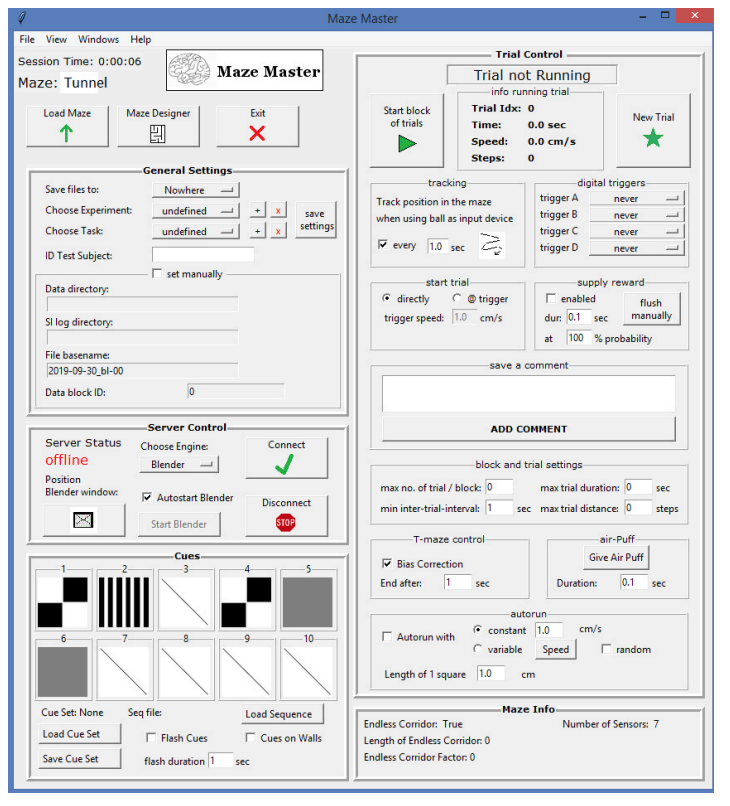

**Figure 3. The main graphical user interface (GUI) for MazeMaster.** It is divided into several panels, which allow the user to set up and configure different kinds of experiments in a virtual maze.

#### 1.4.2 Maze Design: The MazeBuilder Tool
The mazes used in MazeMaster can be of any shape, all kinds of more complex mazes can be created with the MazeBuilder. It has to consist of one starting point and at least one endpoint or reward zone. With the MazeBuilder tool, it is possible to create new mazes by using a drawing board interface. Every element of the maze can be placed and shaped, which includes walls, start and end positions, reward points, teleportation points, and moving walls. It is also possible to create a maze automatically, which is the easiest way to create corridor mazes. This can be done by defining the size of the maze manually by either directly entering the length or by choosing the number of cues or images to show on the corridor walls. In the latter case, the maze is created automatically, matching the number of images. The maze is then saved in the maze folder and can be loaded from MazeMaster. It is also possible to change the maze either by opening it again in MazeBuilder or opening the file and changing the numbers manually. 

**Starting points:** At this point, each trial is started. The virtual user is oriented towards the southern direction of the maze by default. 

**Reward points:** When reaching one of the reward points, a reward can be given and a trial can end and the next trial is started after a set inter-trial-interval. This reward can be configured in size and to only occur with a certain probability, which is set in the GUI. 

**Teleporter points:** This point is the position where the virtual user is moved to, when the teleportation feature is used. Teleportation is normally done, after reaching a certain position sensor. 

**Position Sensors:** Position sensors can be placed freely in the mazes in the maze builder. They are invisible walls and function as light barrier sensors to trigger certain events when passed. Those events are: 

• Showing visual cues on the maze walls 

• Teleport the virtual user 

• Place/remove an additional wall in the maze

Figure 4, A shows a virtual tunnel that is used as an endless corridor. The last sensor is used to teleport the user back to the beginning of the tunnel, to create the impression of endlessness. The other cues are used to flash images (cues) on the walls of the tunnel. They are automatically created when using the create (endless) maze by pictures function in the maze builder. 


### *Figure 4. A virtual tunnel in MazeMaster.*
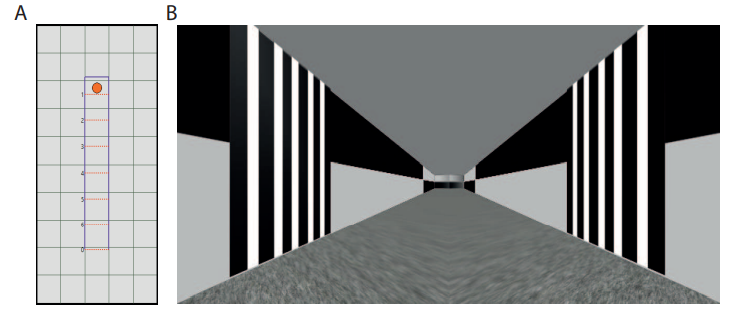

**Figure 4.** A virtual tunnel in MazeMaster. A) An example of a virtual tunnel, containing seven position-sensors. In this example, the last sensor (0) is used for teleportation to the beginning, whereas the other six (1-6) are used for triggering cue presentation. B) Example screenshot for a virtual tunnel maze, in which a cue is flashed to the maze walls.

#### 1.4.3 Maze Design: Special maze types. 

**T-Maze.** A special type of complex maze is the T-Maze. It consists of two arms in which the reward points are placed. Only one of them is shown during the trial, chosen by random. Alternatively, both of them can be made invisible and additional cues can be given to indicate the correct arm of the maze to run into. 

**Corridor Maze.** This maze type consists of a linear tunnel. It is functionally similar to complex mazes when a reward point is placed at the end of the corridor. Cues can be used as background texture on the walls. An often-used type of corridor maze is an endless corridor. In this type of maze, the corridor seems to be endless, the virtual user can move without reaching an end. Nevertheless, there can be a separation into single trials, which are saved and restarted after a certain distance or time. This becomes handy when triggering other hardware like a camera or a microscope, or just to separate the data into repeating parts. 


#### 1.4.4 Input Devices

In most cases, the movement of the animal is controlled by either a ball or a wheel. MazeMaster offers interfaces for incremental rotary encoders (1-D movement) or movement read by optical/laser computer mice (2-D movement). Which device to use is specified in the configuration window. The connection to the rotary encoder can be established by using a National Instruments card and the appropriate drivers (nidaqmx module for Python). The position of the wheel can then be read as a number, which is depending on the resolution of the encoder (e.g. 360 or 1024 ticks per cycle). The ball can be read by positioning two computer mice on two orthogonal sides. The movement of the ball is then recorded by those optical mouses and the movement is transferred to MazeMaster. New kinds of devices can be set up by adding classes to the input.py module, inherited from the Tracking base class. 

**Movement Modes.** Normally, the virtual subject moves accordingly to the input of the encoder (Wheel) or the computer mice (Ball). The length of one square in the maze can be defined in the trial control section. In addition to the normal running, there is the possibility of using the autorun mode (control section). This mode can be used either with a constant automatic movement (constant mode), or a movement profile of a recent trial (variable mode). For the latter option, the trial data file has to be loaded to extract the movement data.

**Starting the trial.** A trial can be started either directly or with a running trigger. When the trigger is used, the start of the trial is delayed until a certain speed is reached on the wheel/ball. This mode enables the test subject to start the trial by themselves trough running. 



#### 1.4.5 Digital Trigger

To connect and communicate with all kinds of other devices (or software), there are up to four digital triggers to use. They can be individually triggered either once at the beginning of the session, at the beginning of each trial or the end of each trial. The triggers can be used with a NI-card

#### 1.4.6 Behavioural Features.


**Lick Detection.** It is possible to use up to two input signals, which are normally used as lick detection devices. Those two lines are just digital input pulses and therefore can be used with all kinds of devices. 

**Rewards.** When a reward area is reached, a water reward can be delivered. This can be done automatically with a certain probability and duration/amount of water. Up to two valves are controlled by this via the NI-card. The signal lines of the valves have to be connected to the ports of the NI board to trigger the opening. 

**Behaviour Analysis.** When doing a behaviour task, it is important to monitor the outcome of all trials, to check for parameters like performance or to detect a bias. This can be done in the behaviour panel and fits experimental designs based on a 2-AFC task. Experiments are normally done in a T-Maze or the tunnel maze. 

**Air-puffs.** An air-puff can be given by clicking the button in the Trial Control section. The valve (digital port) will open for the set duration. 


#### 1.4.7 Events

All kinds of events can be triggered automatically when reaching a light-barrier-like sensor in the maze. The rules for programming the sensors are defined in the rules window. Any number of events can be set for each sensor. 


**Visual Cues.** The placing of visual cues on the maze walls is done automatically by passing one of the position sensors. Up to 10 cues can be loaded from texture files. The presentation time can be set, as well as the side (left or right wall) of stimulation. The cue appears on the wall at a 45° angle from the point of view on the chosen side. 

**Teleport.** Teleportation can be done when passing one of the position sensors. The virtual subject is placed immediately at the teleportation point. Additional walls Predefined additional walls can be placed in the maze when passing a certain position sensor. Alternatively, predefined additional walls can be removed. 


#### 1.4.8 Custom Scripts
User-written scripts can be loaded to add additional functionality to MazeMaster. Those scripts are normally written in python or loaded as a batch file and are executed at adjustable time points during an experiment (start of response period, end of response period, start of trial, on reward, on error, on missed). With the help of those scripts, optional functions can be added without any limitation. 

### 1.5 Blender game engine as the virtual environment

Blender game engine is a component of the modelling software Blender, used for creating real-time interactive content in a realistic 3D environment. The MazeMaster package contains a blender file (.blend), which is executed with the blenderplayer and runs the scripts. The pre-modelled maze from the maze builder is loaded by a custom-written script from within the Blender game engine and is then automatically created as a 3D model. The engine provides realistic physical behaviour for the models, which is especially important for collision with physical boundaries in the virtual world, like the maze walls. With the help of this continuous collision detection, the user is stopped by walls, but not by invisible position sensors or reward areas. Theoretically, even movement in height and therefore in the third dimension is easily possible, but so far not used since movements are either one dimensional along a corridor or two-dimensional within a flat maze. Every maze is built by creating its walls and position sensors at the defined positions. All other elements, like reward areas and visual or sensory cues, are only placed at the defined positions. This means, that those elements can easily be changed (e.g. size, shape, colours, transparency, etc.) in the blender file. 

### 1.6 Experimental Data.
 The data from each experiment session is saved as one general metadata file containing information about the session, one metadata file containing all information about the trials and one data file for each trial. Each occurring event is saved in the data file together with a maze position and a time point. When an encoder (wheel) is used, each movement is tracked and saved. When computer mice are used as an input device, the tracking of position and saving of this data is done at a sampling frequency, specified in the MazeMaster GUI. Figure 5 A shows an excerpt from an example MazeMaster data file for one trial. The movement of the wheel is tracked in an event-based manner. Each change of the wheel position (steps) is saved as a line in the file, together with the time and virtual coordinates (xpos, ypos) within the virtual environment. All other events are also tracked event-based as shown in the three last lines in the example. First, a reward zone was entered (reward ID 0), followed by a lick at the left water spout (lick column). After that, the left water valve opened for 0.05 sec (reward column). Other saved events include passing a position sensor, entering a reward zone, giving a water reward, showing a visual cue and detecting a lick. All information regarding the trials can be found in the metadata file for the trials. There, the trial duration, target-stimulus and response location, the replay file path are saved and if comments have been entered by the user during the trial. The comment itself can be found in the metadata file for the session as an electronic log or notebook (ELN). The data is saved as a csv file. Other formats would be possible. The common file format can be easily opened in spreadsheet processing programs like Excel but also in Python or Matlab. Data is stored in an experiment-, task- and subject-specific file path. This path is created automatically when the task is selected and a name for the test subject entered. The folder structure is hierarchical, ordered first by the experiment, then the task, test subject and finally the date of recording. The filename is a combination of the task, together with the date and the block ID. This number indicates the number of recordings (blocks) on the same day and is incremented automatically. This method should help to maintain a structure for saving and organizing data files. The collected metadata further allows reproducible experiments and automated data analysis routines which are an important requirement for the FAIR principles. The file path can be changed manually, too. The metadata file contains information about the experiment. An exemplary data set is shown in figure 5 B. 

#### *Figure 5. MazeMaster Data files.*
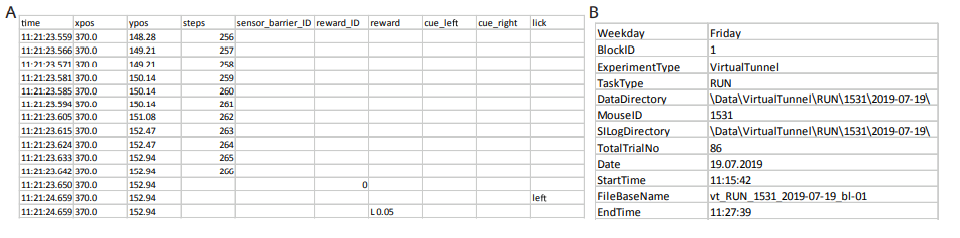

**Figure 5. MazeMaster Data files.** A) An excerpt from a MazeMaster Data output file. Data rows are collected event-based. Each row has a timestamp with the corresponding position in the virtual environment (xpos, ypos). If a wheel with an encoder is used, each step is recorded as a row with the current step counter in the column steps. All other events are listed in the rest of the columns. In this example, the reward area with the ID 0 has been reached, with a lick on the left lick detection, recorded in the following line. After that lick, a reward was given also on the left side with a valve opening time of 0.05 seconds. B) A metadata file, containing all information about a session.

---
## 2. Virtual Reality Test Experiments.
To test the possibilities of doing experiments in a complex virtual reality with MazeMaster, we performed two experiments. The complex maze includes all kinds of mazes other than simple tunnels and there are a lot of established forms of mazes, like a T-maze/Y-maze, a plus-maze or a radial-arm maze. In the first experiment, we used a Y-maze in a 2-AFC task, where the goal for the mouse was to choose the arm with the visible reward area. The second one was a navigation task, where the reward area had to be found and reached within a square-shaped maze. 

**Y-maze.** In this experiment, a reward area was placed in one of two arms of a Y-maze, chosen each trial at random. The test subject had to reach the area to get a water reward. If it chose the wrong arm, the trial was ended and a new one was started automatically. Animals reached up to 76,86 % correct responses in the task, showing that they could successfully find and enter the correct arm with the reward area. 

**Square-maze.** Mice did a navigation experiment in a virtual reality setup with a ball as the input device, to allow for movement in two dimensions through the maze. The mouse had to find this area, starting from the same starting point each trial. There were different possible routes to the target area, which were of different lengths. Mice should learn to find the target area, using the shortest route over time. The route the animal took was tracked, as well as the time it took to reach the target area. Mice learned successfully to run to the reward area, using different paths, which are pictured in figure 6 A. 

The different routes were used with a different frequency, as shown in figure 6 B. The shortest and most direct paths were used most frequently, as it would have been expected. There also was a change in the usage of routes during the experiment. With this measurement, training effects can be shown. The animal will most likely optimize its way during the weeks it participated in the experiment since the maze always stayed the same. This strategy change is pictured in figure 6 C. While the mouse was testing different strategies in the beginning, shown by a more equal distribution of routes used, it focused more and more on one of the shortest ways (green path).

#### *Figure 6. Movement behaviour in a complex square maze.*

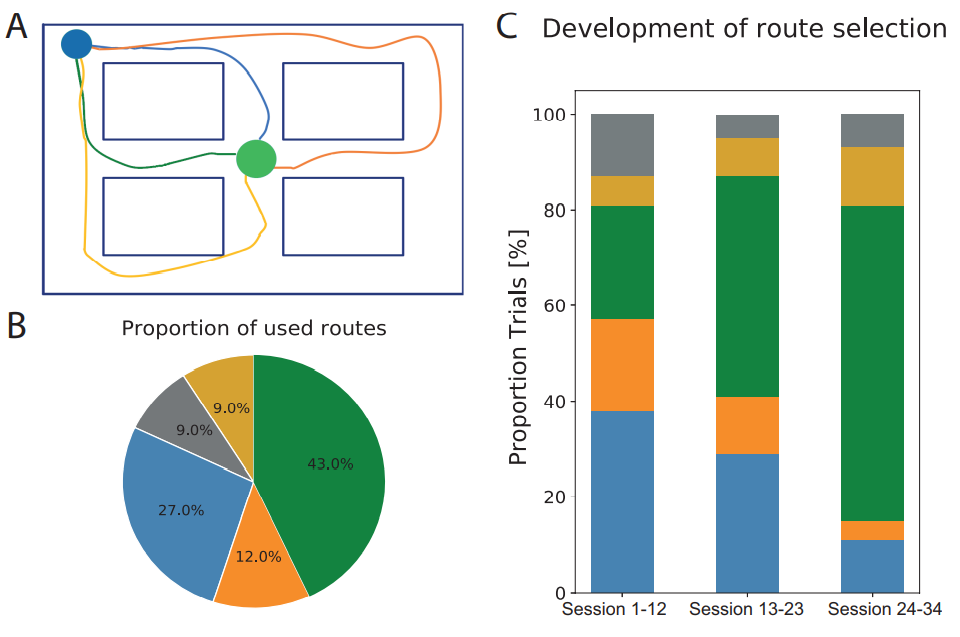

**Figure 6.** Movement behaviour in a complex square maze. A) Different paths are shown, which the mouse took to get to the reward area in an example session. The blue circle shows the starting position, the green circle represents the reward zone. The colours of the routes match the colours in B) and C). B) Proportion of routes the animal took in total. The corresponding routes are shown in A). The grey part represents other routes, which are not shown with a colour. C) The development of the proportion of routes the animal took over the course of the experiment. The 34 sessions in total were divided into three blocks. The grey part represents other routes, which are not shown with a colour. 

---
## 3.1 Implementation in a Virtual Tunnel Experimental Paradigm
The graphical display for the virtual tunnel is provided by a PsychoPy (Peirce, 2007, 2008) based script. PsychoPy is an open-source Python-based application for the presentation of visual stimuli. The Script is connected to the Labview software via a TCP network connection. The software generates sinusoidal gratings automatically, according to a transmitted spatial frequency for the next trial. It also receives input from the incremental encoder, build in the wheel, using NI-DAQmx driver software. In the closed-loop mode, the grating is moved with every rotation of the wheel. In the open-loop condition, the movement is done at a constant speed.


#### *Table 1. List of the used hardware parts.*  

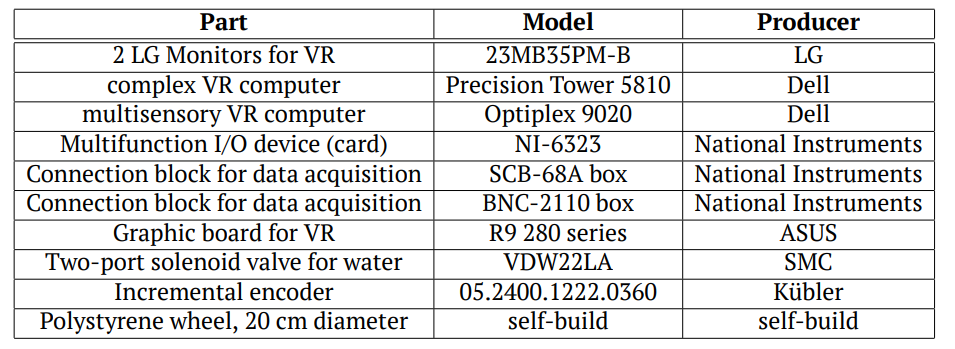

---
## 4.1 *References*

Freeman J (2015) Open source tools for large-scale neuroscience.


Heys JG, Rangarajan KV, Dombeck Da (2014) The Functional Micro-organization of Grid
Cells Revealed by Cellular-Resolution Imaging. Neuron 84:1079–1090.


Wilkinson MD, Dumontier M, Aalbersberg IJ, Appleton G, Axton M, Baak A, Blomberg N,
Boiten JW, da Silva Santos LB, Bourne PE, Bouwman J, Brookes AJ, Clark T, Crosas M,
Dillo I, Dumon O, Edmunds S, Evelo CT, Finkers R, Gonzalez-Beltran A, Gray AJ, Groth
P, Goble C, Grethe JS, Heringa J, ’t Hoen PA, Hooft R, Kuhn T, Kok R, Kok J, Lusher SJ,
Martone ME, Mons A, Packer AL, Persson B, Rocca-Serra P, Roos M, van Schaik R, Sansone SA, Schultes E, Sengstag T, Slater T, Strawn G, Swertz MA, Thompson M, van der
Lei J, van Mulligen E, Velterop J, Waagmeester A, Wittenburg P, Wolstencroft K, Zhao J,
Mons B (2016) The FAIR Guiding Principles for scientific data management and stewardship. Scientific Data 3:160018.